<a href="https://colab.research.google.com/github/lg960214/DACON_Seoul_6/blob/feat%2Fhhj/user_pattern_Top10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#matplotlib 한글깨짐방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [12]:
#2021.11.30~2022.09.22 목적통행_패턴
df=pd.read_csv('/content/drive/MyDrive/DACON6/지하철 이용 정보/서울시 대중교통 이용패턴 정보.csv',encoding='cp949')
df

,기준_날짜,목적통행_패턴,총_승객수,총_승객수_일반,총_승객수_어린이,총_승객수_청소년,총_승객수_경로,총_승객수_장애인
0,20220922,①[경기버스] → ②[지하철] → ③[경기버스] → ④[경기버스] → ⑤[지하철],59,52.0,1.0,6.0,NaN,NaN
1,20220922,①[지하철] → ②[경기버스] → ③[경기버스] → ④[지하철] → ⑤[지하철],1,1.0,NaN,NaN,NaN,NaN
2,20220922,①[경기버스] → ②[지하철] → ③[버스] → ④[버스] → ⑤[버스],165,161.0,1.0,3.0,NaN,NaN
3,20220922,①[지하철] → ②[버스] → ③[버스] → ④[지하철] → ⑤[지하철],4,4.0,NaN,NaN,NaN,NaN
4,20220922,①[경기버스] → ②[경기버스] → ③[지하철] → ④[지하철] → ⑤[버스],3,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
52469,20211130,①[지하철] → ②[버스] → ③[지하철] → ④[경기버스] → ⑤[지하철],16,15.0,NaN,1.0,NaN,NaN
52470,20211130,①[버스] → ②[지하철] → ③[경기버스] → ④[지하철] → ⑤[버스],32,31.0,NaN,1.0,NaN,NaN
52471,20211130,①[버스] → ②[버스] → ③[버스] → ④[버스] → ⑤[지하철],230,220.0,1.0,9.0,NaN,NaN
52472,20211130,①[버스] → ②[경기버스] → ③[지하철] → ④[버스] → ⑤[지하철],4,4.0,NaN,NaN,NaN,NaN


In [18]:
pattern=df.drop(columns=['기준_날짜'])
pattern=pattern.groupby(df['목적통행_패턴']).sum()
pattern.reset_index(level=['목적통행_패턴'], inplace = True)
pattern

,목적통행_패턴,총_승객수,총_승객수_일반,총_승객수_어린이,총_승객수_청소년,총_승객수_경로,총_승객수_장애인
0,①[경기버스] → ②[경기버스] → ③[경기버스] → ④[경기버스] → ⑤[버스],27433,23320.0,175.0,719.0,2828.0,391.0
1,①[경기버스] → ②[경기버스] → ③[경기버스] → ④[경기버스] → ⑤[지하철],8955,8394.0,99.0,462.0,0.0,0.0
2,①[경기버스] → ②[경기버스] → ③[경기버스] → ④[버스],148109,132286.0,926.0,4137.0,9245.0,1515.0
3,①[경기버스] → ②[경기버스] → ③[경기버스] → ④[버스] → ⑤[버스],24016,20899.0,132.0,451.0,2213.0,321.0
4,①[경기버스] → ②[경기버스] → ③[경기버스] → ④[버스] → ⑤[지하철],3906,3700.0,35.0,171.0,0.0,0.0
...,...,...,...,...,...,...,...
236,①[지하철] → ②[지하철] → ③[지하철] → ④[버스] → ⑤[버스],12,10.0,0.0,2.0,0.0,0.0
237,①[지하철] → ②[지하철] → ③[지하철] → ④[버스] → ⑤[지하철],4,4.0,0.0,0.0,0.0,0.0
238,①[지하철] → ②[지하철] → ③[지하철] → ④[지하철],52,39.0,4.0,9.0,0.0,0.0
239,①[지하철] → ②[지하철] → ③[지하철] → ④[지하철] → ⑤[버스],1,1.0,0.0,0.0,0.0,0.0


In [31]:
pattern_total=(pattern[['목적통행_패턴','총_승객수']]
                .sort_values('총_승객수',ascending=False)
                .reset_index(drop=True)
                .iloc[:15]
                )

pattern_total

,목적통행_패턴,총_승객수
0,①[지하철],991976336
1,①[버스],512443364
2,①[버스] → ②[지하철],123340863
3,①[지하철] → ②[버스],112768661
4,①[버스] → ②[버스],110967159
5,①[경기버스] → ②[지하철],58490804
6,①[경기버스] → ②[버스],18059224
7,①[버스] → ②[지하철] → ③[버스],16649208
8,①[버스] → ②[버스] → ③[버스],13958399
9,①[경기버스] → ②[지하철] → ③[버스],9113721


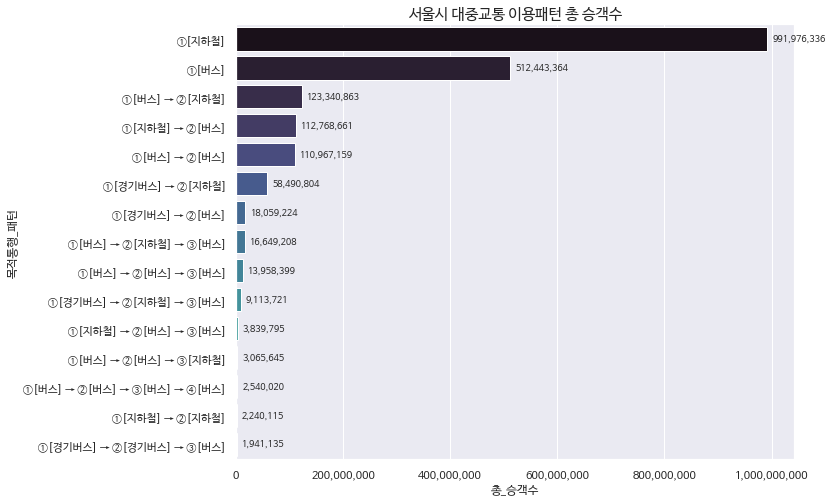

In [113]:
sns.set(rc={"figure.figsize":(10, 8)})
plt.rc('font', family='NanumBarunGothic') 
x=pattern_total['총_승객수']
y=pattern_total['목적통행_패턴']
ax=sns.barplot(x=x,y=y,palette="mako",data=pattern_total,orient='h')
ax.set_title('서울시 대중교통 이용패턴 총 승객수',fontsize=15)
#수치값 표시
for p in ax.patches:
    ax.annotate('{:,.0f}'.format(p.get_width()), (p.get_x() + p.get_width(), p.get_y() + 0.8),fontsize=9,
                xytext=(5, 10), textcoords='offset points')
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values]) 
plt.show()

In [32]:
pattern_regular=(pattern[['목적통행_패턴','총_승객수_일반']]
                .sort_values('총_승객수_일반',ascending=False)
                .reset_index(drop=True)
                .iloc[:15]
                )
pattern_regular['총_승객수_일반']=pattern_regular['총_승객수_일반'].astype(int)             
pattern_regular

,목적통행_패턴,총_승객수_일반
0,①[지하철],746535012
1,①[버스],428548929
2,①[버스] → ②[지하철],117316555
3,①[지하철] → ②[버스],106746918
4,①[버스] → ②[버스],97068622
5,①[경기버스] → ②[지하철],55801987
6,①[경기버스] → ②[버스],16215215
7,①[버스] → ②[지하철] → ③[버스],15740034
8,①[버스] → ②[버스] → ③[버스],12353832
9,①[경기버스] → ②[지하철] → ③[버스],8652144


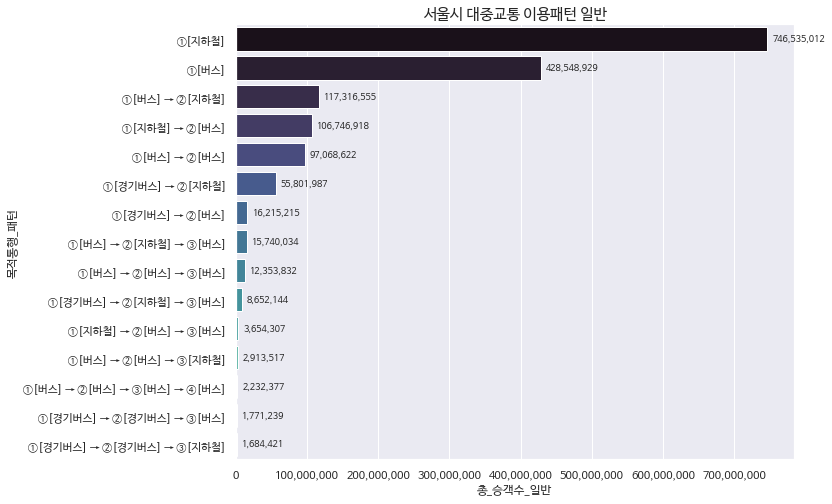

In [116]:
sns.set(rc={"figure.figsize":(10, 8)})
plt.rc('font', family='NanumBarunGothic') 
x=pattern_regular['총_승객수_일반']
y=pattern_regular['목적통행_패턴']
ax=sns.barplot(x=x,y=y,palette="mako",data=pattern_regular,orient='h')
ax.set_title('서울시 대중교통 이용패턴 일반',fontsize=15)
# 수치값 표시
for p in ax.patches:
    ax.annotate('{:,.0f}'.format(p.get_width()), (p.get_x() + p.get_width(), p.get_y() + 0.8),fontsize=9,
                xytext=(5, 10), textcoords='offset points')
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values]) 
plt.show()

In [33]:
pattern_senior=(pattern[['목적통행_패턴','총_승객수_경로']]
                .sort_values('총_승객수_경로',ascending=False)
                .reset_index(drop=True)
                .iloc[:15]
                )
pattern_senior['총_승객수_경로']=pattern_senior['총_승객수_경로'].astype(int) 
pattern_senior

,목적통행_패턴,총_승객수_경로
0,①[지하철],174640810
1,①[버스],22949041
2,①[버스] → ②[버스],5091816
3,①[버스] → ②[버스] → ③[버스],836630
4,①[경기버스] → ②[버스],799735
5,①[지하철] → ②[지하철],478124
6,①[버스] → ②[버스] → ③[버스] → ④[버스],197907
7,①[경기버스] → ②[버스] → ③[버스],81953
8,①[경기버스] → ②[경기버스] → ③[버스],77099
9,①[버스] → ②[버스] → ③[버스] → ④[버스] → ⑤[버스],68530


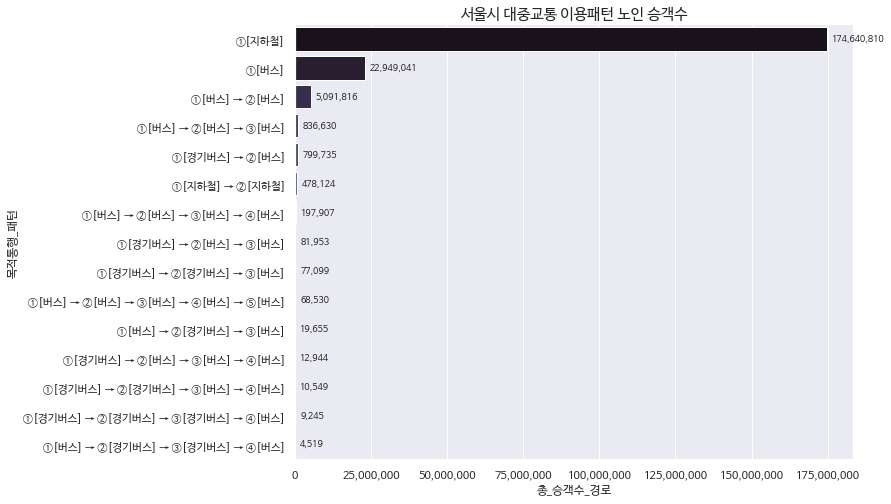

In [119]:
sns.set(rc={"figure.figsize":(10, 8)})
plt.rc('font', family='NanumBarunGothic') 
x=pattern_senior['총_승객수_경로']
y=pattern_senior['목적통행_패턴']
ax=sns.barplot(x=x,y=y,palette="mako",data=pattern_senior,orient='h')
ax.set_title('서울시 대중교통 이용패턴 노인 승객수',fontsize=15)
# 수치값 표시
for p in ax.patches:
    ax.annotate('{:,.0f}'.format(p.get_width()), (p.get_x() + p.get_width(), p.get_y() + 0.8),fontsize=9,
                xytext=(5, 10), textcoords='offset points')
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values]) 

plt.show()